In [1]:
import json
import matplotlib.pyplot as plt
import cv2

# Tusimple Dataset Management Tool
class Tusimple_Manager(object):
    # initialize
    def __init__(self, root_dir = '/home/sun/tusimple'):
        # train data root path
        self.train_path = root_dir + '/train_set/'
        # test data root path
        self.test_path = root_dir + '/test_set/'
        # train data annotation files
        self.train_label_files = ['label_data_0313.json' , 'label_data_0531.json' , 'label_data_0601.json']
        # test data annotation files
        self.test_label_files = ['test_label.json']

        # train annotation data
        self.train_data = []
        # train data size
        self.train_size = 0
        # test annotation data
        self.test_data = []
        # test data size
        self.test_size = 0

        # number of train_instance 1
        self.train_instance_1 = []
        # number of train_instance 2
        self.train_instance_2 = []
        # number of train_instance 3
        self.train_instance_3 = []
        # number of train_instance 4
        self.train_instance_4 = []
        # number of train_instance 5
        self.train_instance_5 = []
        # number of train_instance 6
        self.train_instance_6 = []


        # number of test_instance 1
        self.test_instance_1 = []
        # number of test_instance 2
        self.test_instance_2 = []
        # number of test_instance 3
        self.test_instance_3 = []
        # number of test_instance 4
        self.test_instance_4 = []
        # number of test_instance 5
        self.test_instance_5 = []
        # number of test_instance 6
        self.test_instance_6 = []

    # load the data
    def tusimple_load_from_json(self):
        # train data load
        print("* Train Data Load Start")
        for idx, label_file in enumerate(self.train_label_files):
            # print("* {} : {} Load Start".format(idx, label_file))

            with open(self.train_path + label_file) as f:
                for line in f.readlines():
                    json_line = json.loads(line)
                    self.train_data.append(json_line)

            # print("* {} : {} Load Finish".format(idx, label_file))
        self.train_size = len(self.train_data)

        print("* Train Data Load Finish")

        # test data load
        print("* Test Data Load Start")

        for idx, label_file in enumerate(self.test_label_files):
            # print("* {} : {} Load Start".format(idx, label_file))

            with open(self.test_path + label_file) as f:
                for line in f.readlines():
                    json_line = json.loads(line)
                    self.test_data.append(json_line)

        self.test_size = len(self.test_data)

        print("* Test Data Load Finish")

    # split according to the number of instances
    def tusimple_split_instance(self):
        print("**-----------------------------------------------**")
        print("* Train Data Split Start")
        # train data split
        for idx,instance in enumerate(self.train_data):
            if len(instance['lanes']) == 1:
                self.train_instance_1.append(instance)
            elif len(instance['lanes']) == 2:
                self.train_instance_2.append(instance)
            elif len(instance['lanes']) == 3:
                self.train_instance_3.append(instance)
            elif len(instance['lanes']) == 4:
                self.train_instance_4.append(instance)
            elif len(instance['lanes']) == 5:
                self.train_instance_5.append(instance)
            elif len(instance['lanes']) == 6:
                self.train_instance_6.append(instance)


        print("num_train_instance_1 : {}".format(len(self.train_instance_1)))
        print("num_train_instance_2 : {}".format(len(self.train_instance_2)))
        print("num_train_instance_3 : {}".format(len(self.train_instance_3)))
        print("num_train_instance_4 : {}".format(len(self.train_instance_4)))
        print("num_train_instance_5 : {}".format(len(self.train_instance_5)))
        print("num_train_instance_6 : {}".format(len(self.train_instance_6)))


        print("* Train Data Split Finish")
        print("**-----------------------------------------------**")

        print("* Test Data Split Start")

        # test data split
        for idx,instance in enumerate(self.test_data):
            if len(instance['lanes']) == 1:
                self.test_instance_1.append(instance)
            elif len(instance['lanes']) == 2:
                self.test_instance_2.append(instance)
            elif len(instance['lanes']) == 3:
                self.test_instance_3.append(instance)
            elif len(instance['lanes']) == 4:
                self.test_instance_4.append(instance)
            elif len(instance['lanes']) == 5:
                self.test_instance_5.append(instance)
            elif len(instance['lanes']) == 6:
                self.test_instance_6.append(instance)

        print("num_test_instance_1 : {}".format(len(self.test_instance_1)))
        print("num_test_instance_2 : {}".format(len(self.test_instance_2)))
        print("num_test_instance_3 : {}".format(len(self.test_instance_3)))
        print("num_test_instance_4 : {}".format(len(self.test_instance_4)))
        print("num_test_instance_5 : {}".format(len(self.test_instance_5)))
        print("num_test_instance_6 : {}".format(len(self.test_instance_6)))

        print("* Test Data Split Finish")

        print("**-----------------------------------------------**")



In [2]:
tusimple_manager = Tusimple_Manager()

In [3]:
tusimple_manager.tusimple_load_from_json()

* Train Data Load Start
* Train Data Load Finish
* Test Data Load Start
* Test Data Load Finish


In [4]:
tusimple_manager.tusimple_split_instance()

**-----------------------------------------------**
* Train Data Split Start
num_train_instance_1 : 0
num_train_instance_2 : 1
num_train_instance_3 : 404
num_train_instance_4 : 2982
num_train_instance_5 : 239
num_train_instance_6 : 0
* Train Data Split Finish
**-----------------------------------------------**
* Test Data Split Start
num_test_instance_1 : 0
num_test_instance_2 : 5
num_test_instance_3 : 1740
num_test_instance_4 : 468
num_test_instance_5 : 569
num_test_instance_6 : 0
* Test Data Split Finish
**-----------------------------------------------**


In [5]:
data = tusimple_manager.train_instance_5[0]

In [6]:
# load image
clip_dir = tusimple_manager.train_path + data['raw_file']

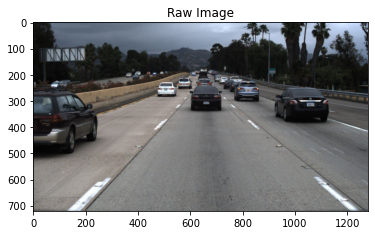

In [7]:
image = cv2.imread(clip_dir)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.title("Raw Image")
plt.imshow(image)

In [8]:
import numpy as np

datas = []

for lane_idx, lane_x_points in enumerate(data['lanes'],0):
    curve_vertices = list(filter(lambda xy_pair : xy_pair[0] > 0, zip(lane_x_points, data['h_samples'])))
    curve_vertices = np.array(curve_vertices, dtype=np.float)
    datas.append(np.flip(curve_vertices, axis=0))

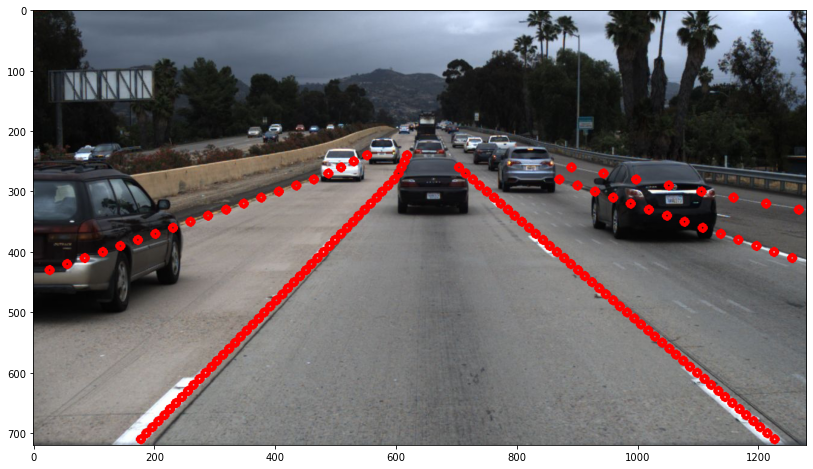

In [9]:
vis_image = image.copy()


for data in datas:
    for pt in data:
        cv2.circle(vis_image, (int(pt[0]), int(pt[1])), radius=5, color=(255,0,0), thickness=5)

plt.rcParams["figure.figsize"] = (28,8)
plt.imshow(vis_image)
inf_image = vis_image.copy()

In [10]:
for data in datas:
    data[:, 0] = data[:, 0]/1280.0
    data[:, 1] = data[:, 1]/720.0
    
#     print(data)
    
#     plt.plot(data[:, 0], data[:, 1])

In [11]:
train_sizes = []
test_sizes = []

for data in datas:
    train_size = int(len(data))
    test_size = len(data) - train_size
    
    train_sizes.append(train_size)
    test_sizes.append(test_size)

train_sizes, test_sizes

([20, 48, 46, 14, 8], [0, 0, 0, 0, 0])

20
5
48
5
46
5
14
5
8
5


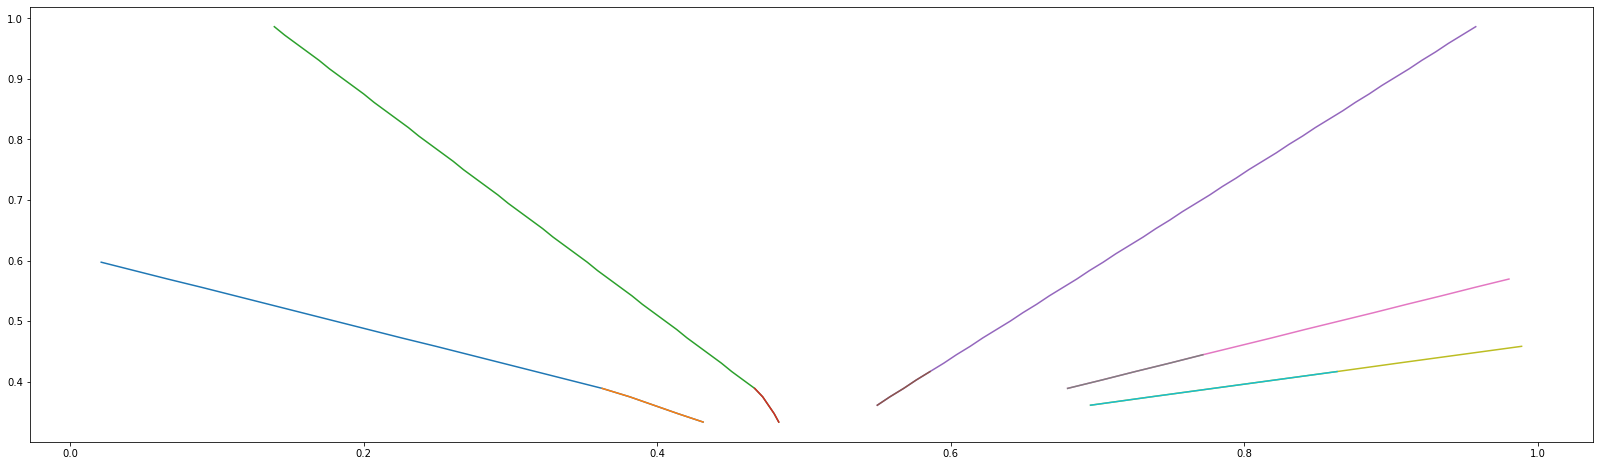

In [12]:
seq_len = 5

train_sets = []
test_sets = []

for idx, data in enumerate(datas):
    train_set = data[:train_sizes[idx]]
    print(len(train_set))
    test_set = data[train_sizes[idx]-seq_len:]
    print(len(test_set))
    
    train_sets.append(train_set)
    test_sets.append(test_set)
    
    plt.plot(train_set[:,0], train_set[:,1])
    plt.plot(test_set[:,0], test_set[:,1])
    
plt.show()

In [13]:
def make_sequence(norm_data, seq_len):
    inout_seq = []
    L = len(norm_data)
    
    data_x = []
    data_y = []
    
    for i in range(L-seq_len):
        train_seq = norm_data[i:i+seq_len, 1]
        test_label = norm_data[i+seq_len:i+seq_len+1, 0]
        
        data_x.append(train_seq)
        data_y.append(test_label)
    
    return np.array(data_x), np.array(data_y)

In [14]:
train_x_s = []
train_y_s = []

test_x_s = []
test_y_s = []

for train_set in train_sets:
    train_x, train_y = make_sequence(train_set, seq_len)
    train_x_s.append(train_x)
    train_y_s.append(train_y)

for test_set in test_sets:
    test_x, test_y = make_sequence(test_set, seq_len)
    test_x_s.append(test_x)
    test_y_s.append(test_y)

In [15]:
import torch
import torch.nn as nn
from torch.autograd import Variable

train_x_tensors = []
train_y_tensors = []

test_x_tensors = []
test_y_tensors = []

for train_x in train_x_s:
    train_x_tensors.append(Variable(torch.Tensor(train_x)))

for train_y in train_y_s:
    train_y_tensors.append(Variable(torch.Tensor(train_y)))

for test_x in test_x_s:
    test_x_tensors.append(Variable(torch.Tensor(test_x)))
#     print(torch.Tensor(test_x).shape)
    
for test_y in test_y_s:
    test_y_tensors.append(Variable(torch.Tensor(test_y)))
    
print(len(train_x_tensors))
print(len(train_y_tensors))

print(len(test_x_tensors))
print(len(test_y_tensors))

print(test_x_tensors)

5
5
5
5
[tensor([]), tensor([]), tensor([]), tensor([]), tensor([])]


In [16]:
class LSTM(nn.Module):
    def __init__(self, num_classes=1, input_size=1, hidden_size=50, num_layers =2 ,output_size = 1 ):
        super(LSTM,self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.lstm = nn.LSTM(input_size = input_size, hidden_size=hidden_size,num_layers = num_layers, batch_first = True)
        self.layers = nn.Sequential(
            nn.Linear(hidden_size, 100),
            nn.Linear(100,50),
            nn.Linear(50, output_size)
        )
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        output, (hidden, cell) = self.lstm(x, (h_0, c_0))
        output = self.relu(output)
        output = self.layers(output[:,-1,])
        return output


In [17]:
# model definition

models = []
criterions = []
optimizers = []

for i in range(len(train_x_tensors)):
    model = LSTM()
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    models.append(model)
    criterions.append(criterion)
    optimizers.append(optimizer)

# # criterion 1,2
# criterion_1 = torch.nn.MSELoss()
# criterion_2 = torch.nn.MSELoss()

# # optimizer 1,2
# optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=0.001)
# optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=0.001)

In [18]:
for idx, (train_x_tensor, train_y_tensor) in enumerate(zip(train_x_tensors, train_y_tensors)):
        if idx == 0:
            train_x_numpy = train_x_tensor.data.numpy()*720
            train_y_numpy = train_y_tensor.data.numpy()*1280
#             print('idx : {}'.format(idx))
            gt_pair = np.array(list(zip(train_y_numpy, train_x_numpy)))
            
#             print(gt_pair)
        if idx == 1:
            train_x_numpy = train_x_tensor.data.numpy()*720
            train_y_numpy = train_y_tensor.data.numpy()*1280
            
            gt_pair = np.array(list(zip(train_y_numpy, train_x_numpy)))
            
#             print('idx : {}'.format(idx))
#             print(gt_pair)
            

In [19]:
epochs = 500
best_loss_1 = 100000000
best_loss_2 = 100000000

    
train_loss_1 = []
train_loss_2 = []
    
test_loss_1 = []
test_loss_2 = []
    
for epoch in range(epochs):
#     model_1.train()
#     model_2.train()

    for idx, (train_x_tensor, train_y_tensor) in enumerate(zip(train_x_tensors, train_y_tensors)):
        models[idx].train()
        optimizers[idx].zero_grad()
        
        predict = models[idx].forward(train_x_tensor.view(len(train_x_tensor), seq_len, 1))
        
        loss = criterions[idx](predict, train_y_tensor)
        
        loss.backward()
        
        optimizers[idx].step()
                
#         if idx == len(train_x_tensors)-1 and epoch%25 == 0:
#             print('* Lane 1 : Epoch {}, Loss {:.5f}'.format(epoch, loss.item()))
#             print('* Lane 2 : Epoch {}, Loss {:.5f}'.format(epoch, loss_2.item()))

In [20]:
# plt.plot(train_loss_1)
# plt.plot(train_loss_2)
# plt.plot(test_loss_1)
# plt.plot(test_loss_2)

# plt.legend(['train_loss_1', 
#            'train_loss_2',
#            'test_loss_1',
#            'test_loss_2'])

In [21]:
# model_1.eval()
# model_2.eval()
    
# with torch.no_grad():
#     for idx, (test_x_tensor, test_y_tensor) in enumerate(zip(test_x_tensors, test_y_tensors)):
#         if idx == 0:
#             inference_1 = model_1.forward(test_x_tensor.view(len(test_x_tensor), seq_len, 1)).data.numpy()
            
#             test_x_numpy = test_x_tensor.data.numpy()
#             test_y_numpy = test_y_tensor.data.numpy()*1280
            
#             y_points = test_x_numpy[:, -1]*720 - 10
            
#             inference_1 = np.squeeze(inference_1, axis=1)*1280
            
#             gt_pair = np.array(list(zip(test_y_numpy, y_points)))
#             predict_pair = np.array(list(zip(inference_1, y_points)))
            
#             for pt in gt_pair:
#                 print(pt)
#                 cv2.circle(vis_image, (int(pt[0]), int(pt[1])), radius=5, color = (0,0,255), thickness=5)
#             for pt in predict_pair:
#                 cv2.circle(vis_image, (int(pt[0]), int(pt[1])), radius=5, color = (0,255,0), thickness=5)
#         elif idx == 1:
#             inference_2 = model_2.forward(test_x_tensor.view(len(test_x_tensor), seq_len, 1)).data.numpy()
            
#             test_x_numpy = test_x_tensor.data.numpy()
#             test_y_numpy = test_y_tensor.data.numpy()*1280
            
#             y_points = test_x_numpy[:, -1]*720 - 10
            
#             inference_2 = np.squeeze(inference_2, axis=1)*1280
            
#             gt_pair = np.array(list(zip(test_y_numpy, y_points)))
#             predict_pair = np.array(list(zip(inference_2, y_points)))
            
#             for pt in gt_pair:
#                 #print(pt)
#                 cv2.circle(vis_image, (int(pt[0]), int(pt[1])), radius=5, color = (255,0,255), thickness=5)
#             for pt in predict_pair:
#                 cv2.circle(vis_image, (int(pt[0]), int(pt[1])), radius=5, color = (0,255,255), thickness=5)
#     plt.imshow(vis_image)

In [22]:
new_test_set = np.arange(720, 0, -10)
new_test_set

array([720, 710, 700, 690, 680, 670, 660, 650, 640, 630, 620, 610, 600,
       590, 580, 570, 560, 550, 540, 530, 520, 510, 500, 490, 480, 470,
       460, 450, 440, 430, 420, 410, 400, 390, 380, 370, 360, 350, 340,
       330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210,
       200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100,  90,  80,
        70,  60,  50,  40,  30,  20,  10])

In [23]:
def make_test_sequence(input_, seq_len):
    L = len(input_)
    
    data_x = []
    
    for i in range(L-seq_len):
        train_seq = input_[i:i+seq_len]
        
        data_x.append(train_seq)
    
    return np.array(data_x, dtype=np.float)

In [24]:
new_test = [] 

test_set = make_test_sequence(new_test_set, seq_len)/720

for i in range(len(train_x_tensors)):
    new_test.append(test_set)

In [25]:
new_test_x_tensors = []

for new_test_x in new_test:
    new_test_x_tensors.append(Variable(torch.Tensor(new_test_x)))

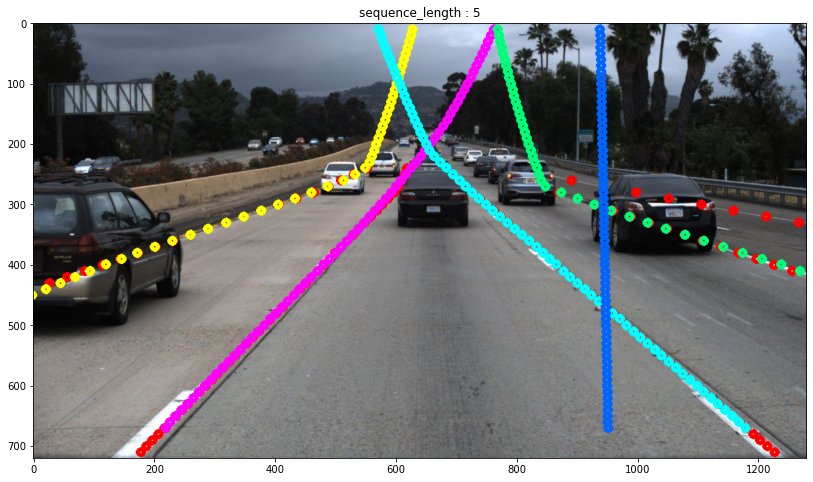

In [26]:
# inference
color_three = [(255,255,0),
        (255,0,255),
        (0,255,255),
        (0,255,120),
        (0,100,255)]
with torch.no_grad():
    for idx, (test_x_tensor, test_y_tensor) in enumerate(zip(new_test_x_tensors, test_y_tensors)):
        models[idx].eval()
        # forward
        inference = models[idx].forward(test_x_tensor.view(len(test_x_tensor), seq_len, 1)).data.numpy()
        
        test_x_numpy = test_x_tensor.data.numpy()
        
        y_points = test_x_numpy[:, -1]*720 - 10
        
        inference = np.squeeze(inference, axis=1)*1280
        
        predict_pair = np.array(list(zip(inference, y_points)))
        
        for pt in predict_pair:
            cv2.circle(vis_image, (int(pt[0]), int(pt[1])), radius=5, color = color_three[idx], thickness=5)
    
    plt.title("sequence_length : " +str(seq_len))
    plt.imshow(vis_image)